### What is Relative Strength Indicator?

It is a momentum oscillator that measurs the speed and change of price movmetns
Has a Range between 0, 100

RSI = 100 - [ 100 / 1 + (Avg. Gain/Avg. Loss) ]

Standard is to use 14 day period for averages

identify bullish and bearish price momentum 

Over sold below .3
Under sold above .3


R(t) =  ( S(t+1) - S(t) ) / S(t)

this is how we calcualte daily returns for given S(t) stock prices.


Calculate log daily returns: 

r(t) = log(  ( S(t+1) - S(t) ) / S(t) )

Calculate returns for n periods:

( S(t) / S(t-n) ) = S(t) / S(t-1) * S(t-1) / S(t-2) * ... * S(t-n+1) / S(t-n)

log [(1 + R(t) * (1 + R(t-1)) * ... * (1 + R(t-n+1) ]


In [20]:
import yfinance as yf
import pandas_datareader.data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import mplfinance as mpf
import matplotlib.dates as mpl_dates
%matplotlib inline

In [3]:
eth_df =pd.read_csv("./data/eth.csv", index_col='Date', parse_dates=True)
eth_df = eth_df.iloc[::-1]
eth_df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-11-29,476.675484,524.356285,427.233001,427.233001,1.497273e+09,4.593803e+10
2017-11-30,431.505862,465.240587,403.099585,447.889008,1.803252e+09,4.209423e+10
2017-12-01,446.687467,473.461463,428.973482,465.688648,1.071947e+09,4.307045e+10
2017-12-02,466.701873,477.328305,457.965814,465.195692,8.105988e+08,4.501313e+10
2017-12-03,465.176425,482.885385,453.236437,466.483835,6.057337e+08,4.525139e+10


In [4]:
eth_df['return'] = np.log(eth_df['Close'] / eth_df['Close'].shift(1))

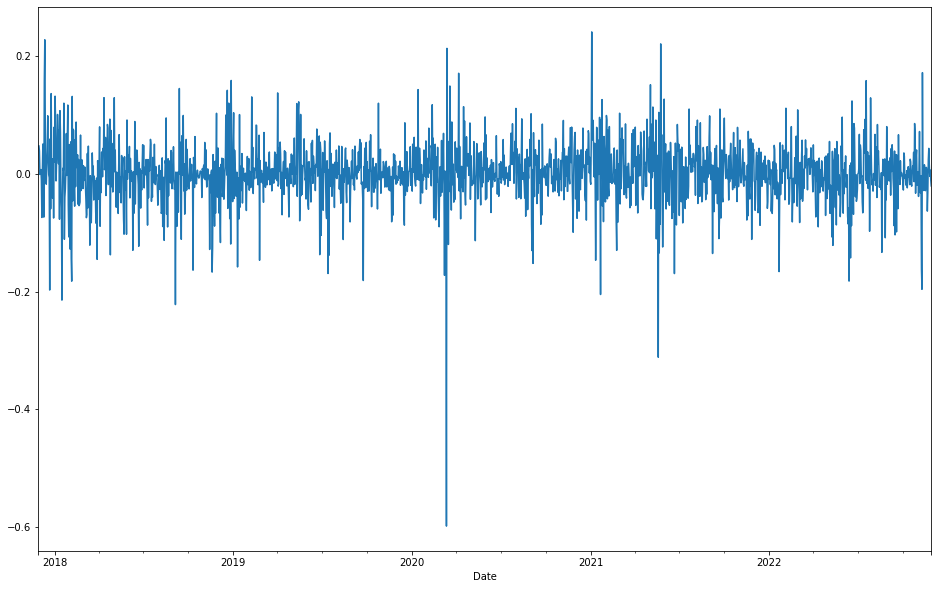

In [5]:
eth_df['return'].plot(figsize=(16,10));

In [6]:
eth_df['move'] = eth_df['Close'] - eth_df['Close'].shift(1)

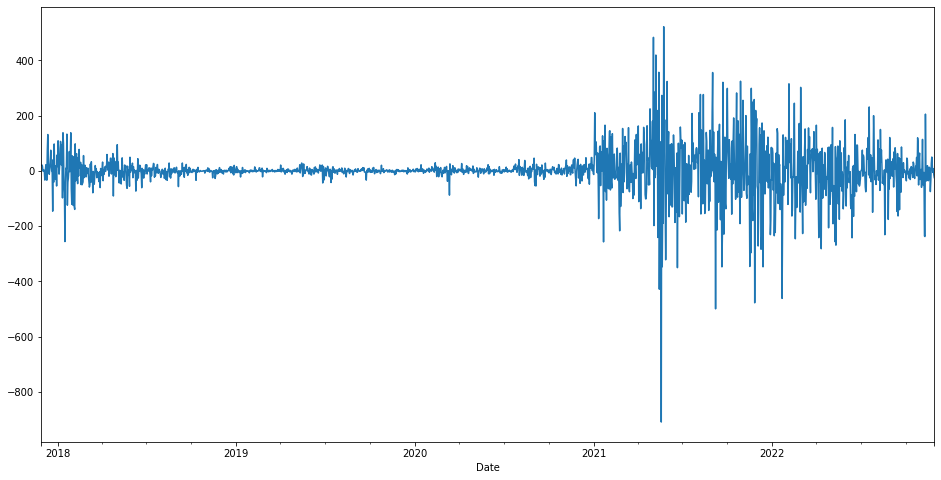

In [7]:
eth_df['move'].plot(figsize=(16,8));

In [8]:
eth_df['up'] = np.where(eth_df['move'] > 0, eth_df['move'], 0)

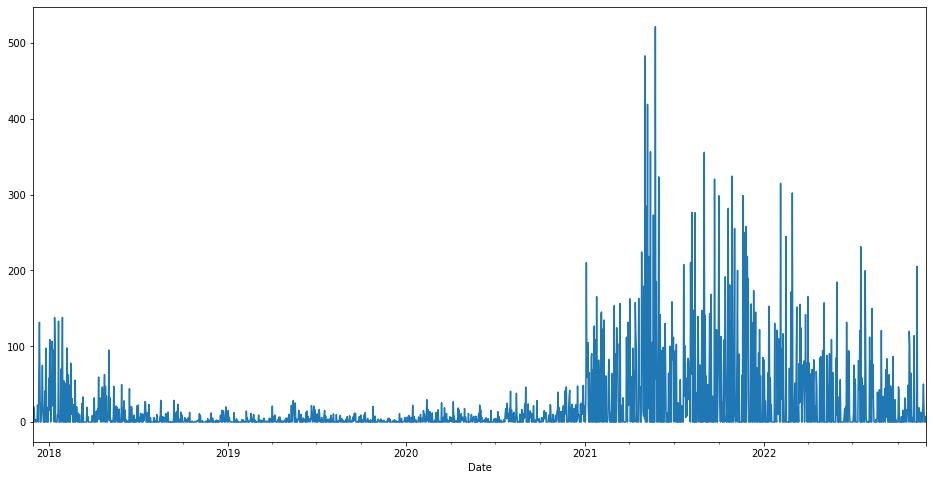

In [9]:
eth_df['up'].plot(figsize=(16,8));

In [10]:
eth_df['down'] = np.where(eth_df['move'] < 0, eth_df['move'],0)

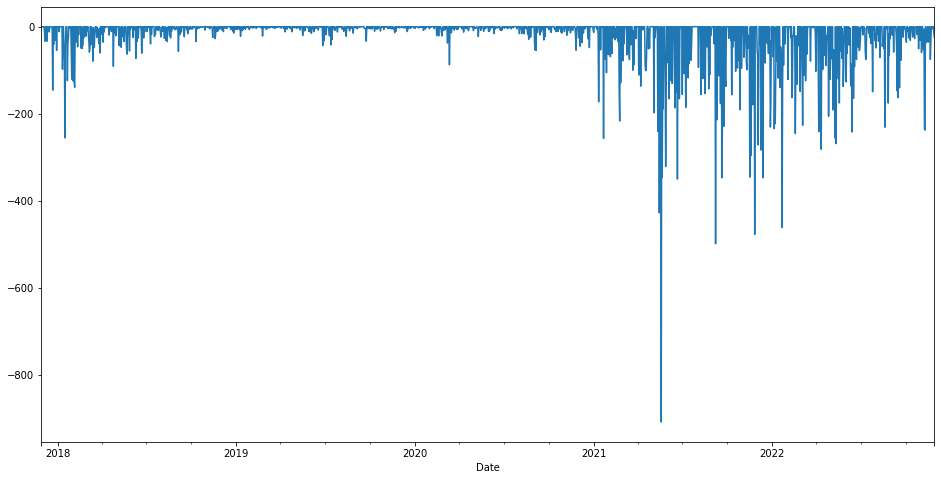

In [11]:
eth_df['down'].plot(figsize=(16,8));

In [12]:
eth_df

,Open,High,Low,Close,Volume,Market Cap,return,move,up,down
Date,,,,,,,,,,
2017-11-29,476.675484,524.356285,427.233001,427.233001,1.497273e+09,4.593803e+10,NaN,NaN,0.000000,0.000000
2017-11-30,431.505862,465.240587,403.099585,447.889008,1.803252e+09,4.209423e+10,0.047216,20.656007,20.656007,0.000000
2017-12-01,446.687467,473.461463,428.973482,465.688648,1.071947e+09,4.307045e+10,0.038972,17.799640,17.799640,0.000000
2017-12-02,466.701873,477.328305,457.965814,465.195692,8.105988e+08,4.501313e+10,-0.001059,-0.492956,0.000000,-0.492956
2017-12-03,465.176425,482.885385,453.236437,466.483835,6.057337e+08,4.525139e+10,0.002765,1.288143,1.288143,0.000000
...,...,...,...,...,...,...,...,...,...,...
2022-11-24,1186.067000,1214.771533,1181.902200,1204.057000,2.079242e+10,1.468174e+11,0.015786,18.857500,18.857500,0.000000
2022-11-25,1204.774000,1204.774000,1175.986487,1199.168447,1.546590e+10,1.456402e+11,-0.004068,-4.888553,0.000000,-4.888553
2022-11-26,1198.443900,1225.973536,1197.908439,1206.782540,1.476010e+10,1.487204e+11,0.006329,7.614093,7.614093,0.000000


In [13]:
eth_df['average_gain'] = eth_df['up'].rolling(14).mean()

In [14]:
eth_df['average_loss'] = eth_df['down'].abs().rolling(14).mean()

In [15]:
# RSI = 100 - [ 100 / 1 + (Avg. Gain/Avg. Loss) ]
eth_df['RS'] = 100.0 - ( 100.0 / (1 + eth_df['average_gain'] / eth_df['average_loss'] ) )

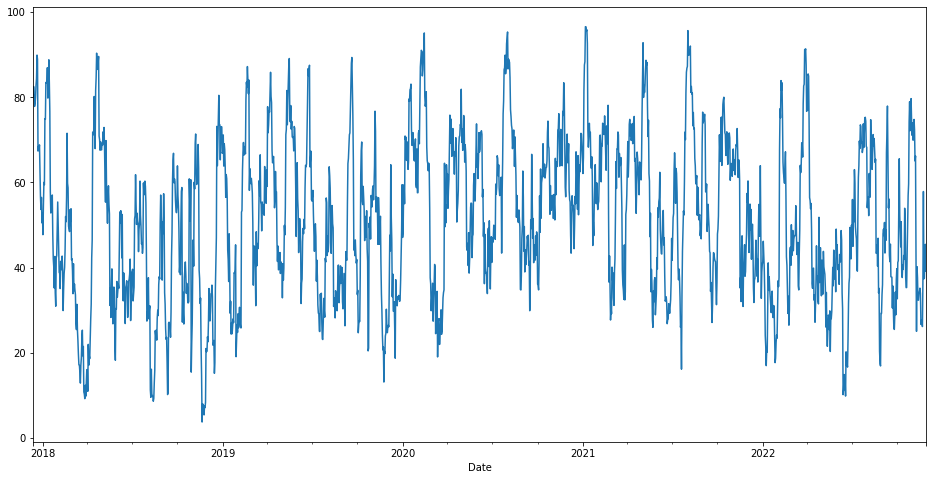

In [16]:
eth_df['RS'].dropna(inplace=True)
eth_df['RS'].plot(figsize=(16,8));

In [17]:
eth_df['short_ma'] = eth_df['Close'].ewm(span=30).mean()

In [26]:
eth_df['long_ma'] = eth_df['Close'].ewm(span=200).mean()

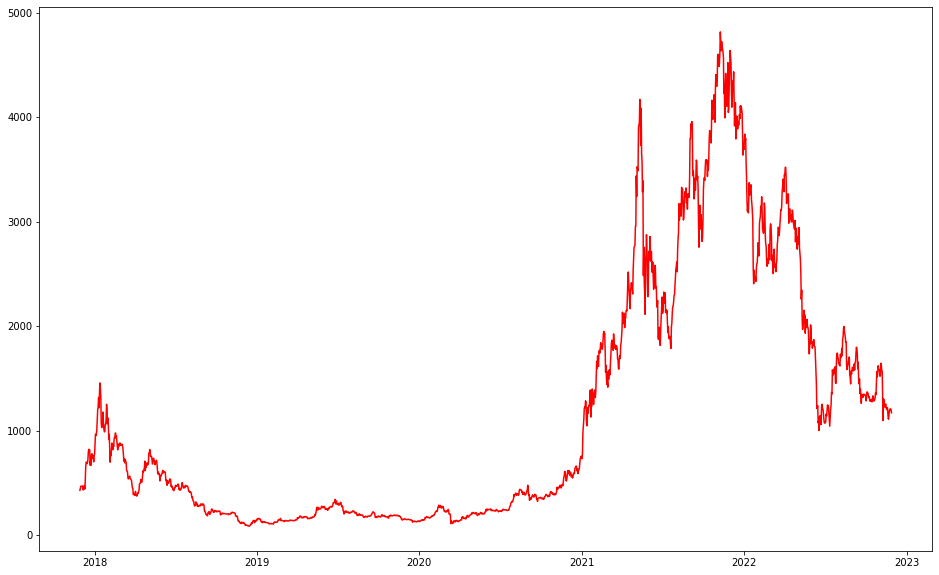

In [19]:
plt.figure(figsize=(16,10))
plt.plot(eth_df['Close'], label='Price', color='red')

/Users/dennismacpro/miniconda3/lib/python3.7/site-packages/mplfinance/_arg_validators.py:93: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


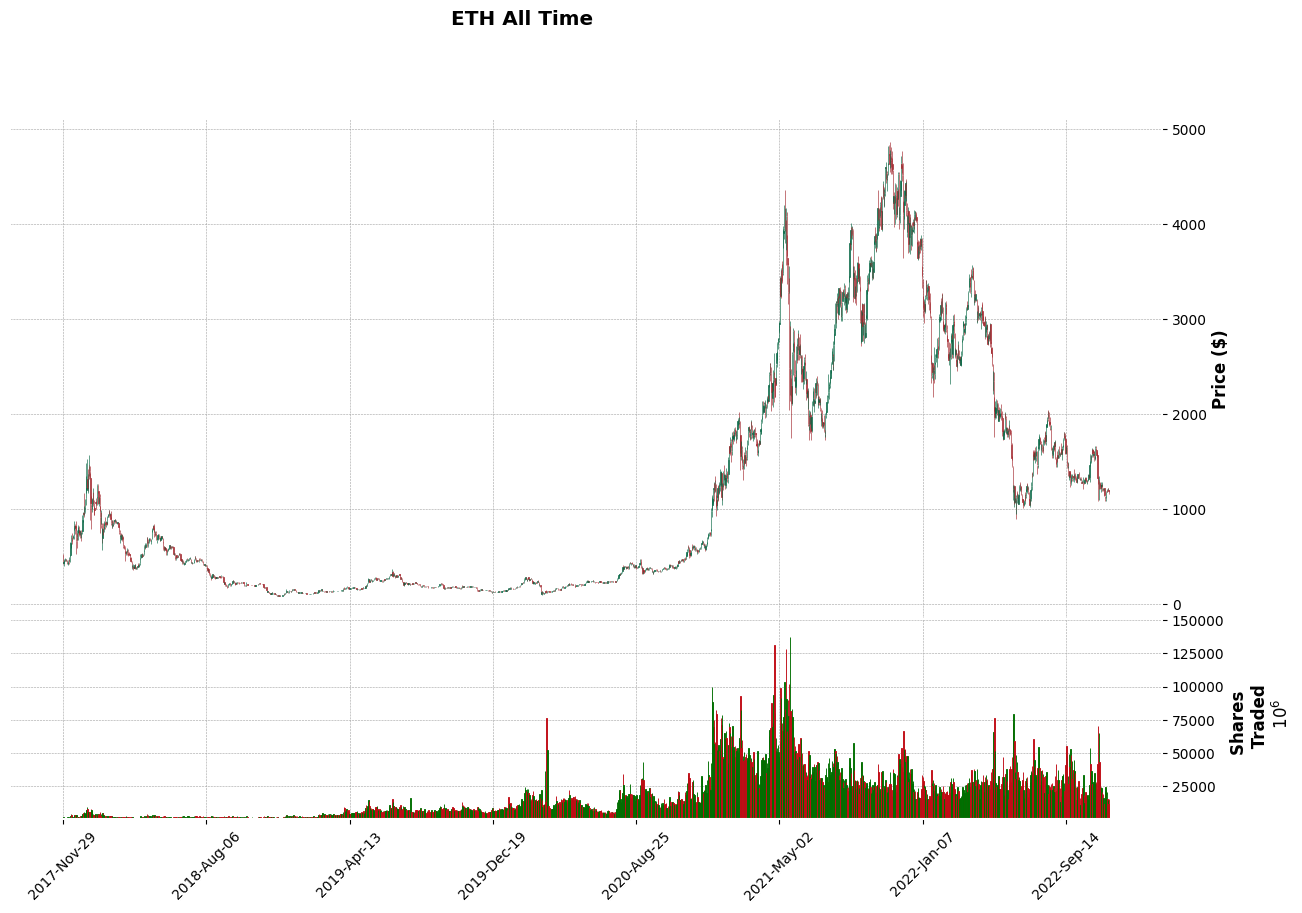

In [31]:
mpf.plot(eth_df[['Open','High','Low','Close','Volume']], type='candle', style='charles',title='ETH All Time', ylabel='Price ($)',ylabel_lower='Shares \n Traded', volume=True, figsize=(16,10));
#ax.plot(eth_df['long_ma'], color='purple',label='200 Day MA')

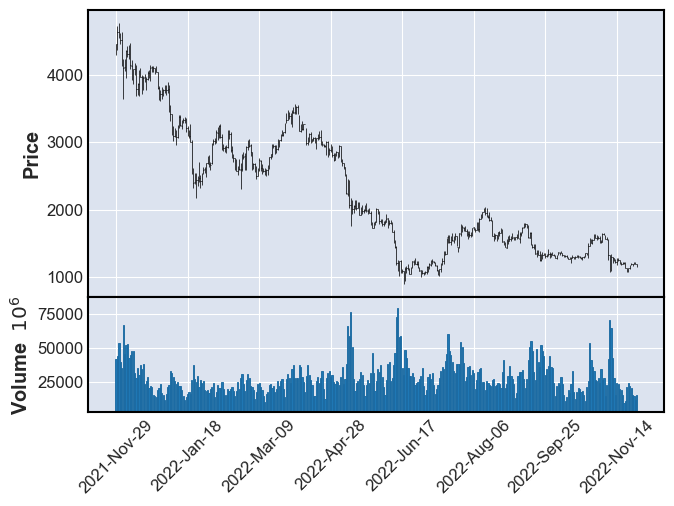

In [34]:
mpf.plot(eth_df.tail(365),volume=True)

In [37]:
# RSI Trading Strategy

In [64]:
class MovingAverageRSITradingStrategy:
    def __init__(self, data, capital, start, end):
        self.data = data
        self.capital = capital
        self.equity = [capital]
        self.start = start
        self.end = end
        self.is_long = False
        
    def plot_performance(self):       
        plt.figure(figsize=(12,6))
        plt.title("Equity Curve")
        plt.plot(self.equity, label='Stock Price', color='green')
        plt.xlabel('Date')
        plt.ylabel('Capital ($)')
        plt.show();
        
    def simmulate(self):
        price_when_buy = 0
        
        for index, row in self.data.iterrows():
            if row['short_ma'] < row['long_ma'] and self.is_long:
                self.equity.append(row['Close'] * self.capital / price_when_buy)
                self.is_long = False
            elif row['short_ma'] > row['long_ma'] and not self.is_long and row['RS'] < 30:
                price_when_buy = row['Close']
                self.is_long = True
    
    def show_stats(self):
        """
        Calculate Sharpe Ratio
        """
        profit = (((float(self.equity[-1]) - float(self.equity[0])) / float(self.equity[0]) * 100))
        print(f"Profit of the trading strategy: {profit} %")
        print(f"Actual Capital {self.equity[-1]}")
        returns = ( self.data['Close'] - self.data['Close'].shift(1) ) / self.data['Close'].shift(1) 
        # annualized 
        sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252)
        print(f"Sharpe Ratio: {sharpe_ratio}")
        

In [69]:
start_date = datetime(2015,1,1)
end_date = datetime(2022,1,1)
capital = 1000000

In [70]:
m = MovingAverageRSITradingStrategy(eth_df,capital, start_date, end_date)

In [71]:
m.simmulate()

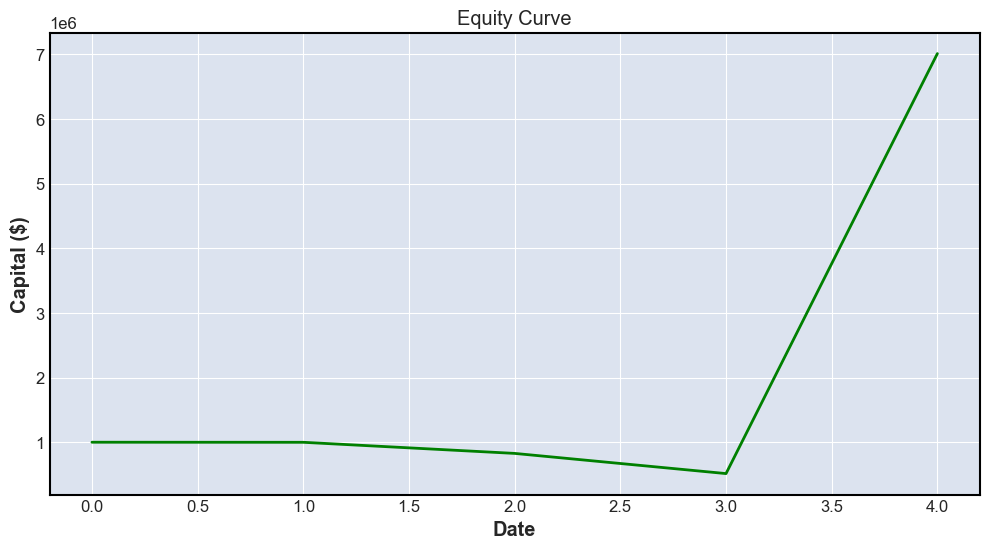

In [72]:
m.plot_performance()

In [73]:
m.show_stats()

Profit of the trading strategy: 600.9649760361593 %
Actual Capital 7009649.760361593
Sharpe Ratio: 0.5855078888017368
